<h1> Lecture 1: The King's Speech: Comparing Xi and Hu’s Party Congress Speeches </h1>
<h4>King-wa Fu</h4>
<h4>January 15, 2018</h4>

|    |  |
:-------------------------:|:-------------------------:
![](https://ichef.bbci.co.uk/images/ic/128x128/p05kggyd.jpg)  |  ![](http://image.guardian.co.uk/sys-images/Guardian/Pix/pictures/2002/11/15/hujiaa.jpg)
Xi Jinping | Hu jintao

Chinese leader’s speech at the significant political event is a key for public and media to understand the country’s strategy and future development. This short article aims to analyze and compare the speeches made by two Chinese Communist Party leaders at the Party Congress: Xi Jinping’s speech at the 19th Party Congress (2017) and Hu jintao’s the 17th party congress (2007).

First at all, let’s obtain the copy of Xi Jinping’s speech at the 19th Party Congress.The file is in plain text format.

In [20]:
library("wordcloud")
library("tm")

In [21]:
con <- url("https://raw.githubusercontent.com/jmsc-bc4j/JMSC6116_public/c3e6e6d6cdc555e78a83f1b81e6cc4c7b51d1377/Xi.txt") # Establish a connection via url
xi <- readLines(con)  # Read line by line from the connection to a string array xi
close(con) # Remember to close the connection after use
xi[1:3] # List the first three lines of Xi's speech

[1] "Comrades,"                                                                                                                          
[2] ""                                                                                                                                   
[3] "On behalf of the 18th Central Committee of the Communist Party of China, I will now deliver a report to the 19th National Congress."

Next, we get the copy of Hu jintao’s 17th Party Congress speech.

In [22]:
con <- url("https://raw.githubusercontent.com/jmsc-bc4j/JMSC6116_public/c3e6e6d6cdc555e78a83f1b81e6cc4c7b51d1377/Hu.txt")
hu <- readLines(con)
close(con)

Then, we define a R function, namely Preprocessing, to convert all characters to lower case (for counting purpose), remove the punctuations and “stopwords”, and “clean” the text data into a format for next step. The first three line of the “cleaned” version of Xi’s speech are displayed.

In [23]:
Preprocessing <- function(sT){
  #create corpus
  r_stats_text_corpus <- Corpus(VectorSource(sT))
  #clean up
  r_stats_text_corpus <- tm_map(r_stats_text_corpus, function(x)chartr("ABCDEFGHIJKLMNOPQRSTUVWXYZ","abcdefghijklmnopqrstuvwxyz",x))### Convert to lower case
  r_stats_text_corpus <- tm_map(r_stats_text_corpus, removePunctuation)   ### remove punctuation
  r_stats_text_corpus <- tm_map(r_stats_text_corpus, function(x)removeWords(x,stopwords("english")))  #### remove stopwords
  return(r_stats_text_corpus)
}

xi <- paste(xi,collapse=" ") # Collapse into one single line
hu <- paste(hu,collapse=" ")
xi.p <- Preprocessing(xi) # Send the array xi to the function for data cleaning
hu.p <- Preprocessing(hu) # Output the results to xi.p and hu.p (class "Corpus")
substr(xi.p$content,1,200) # Inspect the first 200 words of Xi's "cleaned" speech

[1] "comrades   behalf   18th central committee   communist party  china  will now deliver  report   19th national congress   19th national congress   communist party  china   meeting  great importance tak"

Ok. So we now compare Xi and Hu’s speeches by using histogram plot. As a first step, a term document matrix, which stores the words used (by rows) and the two leaders (by columns), is created.

In [24]:
tdm <- TermDocumentMatrix(Corpus(VectorSource(c(xi.p$content,hu.p$content)))) # Create a term document matrix
tdm <- as.matrix(tdm) # convert it into a standard matrix
colnames(tdm) <- c("Xi's speech","Hu's speech") # Assign the names to the columns

Here you go. The Top-5 high frequency term plot is created.

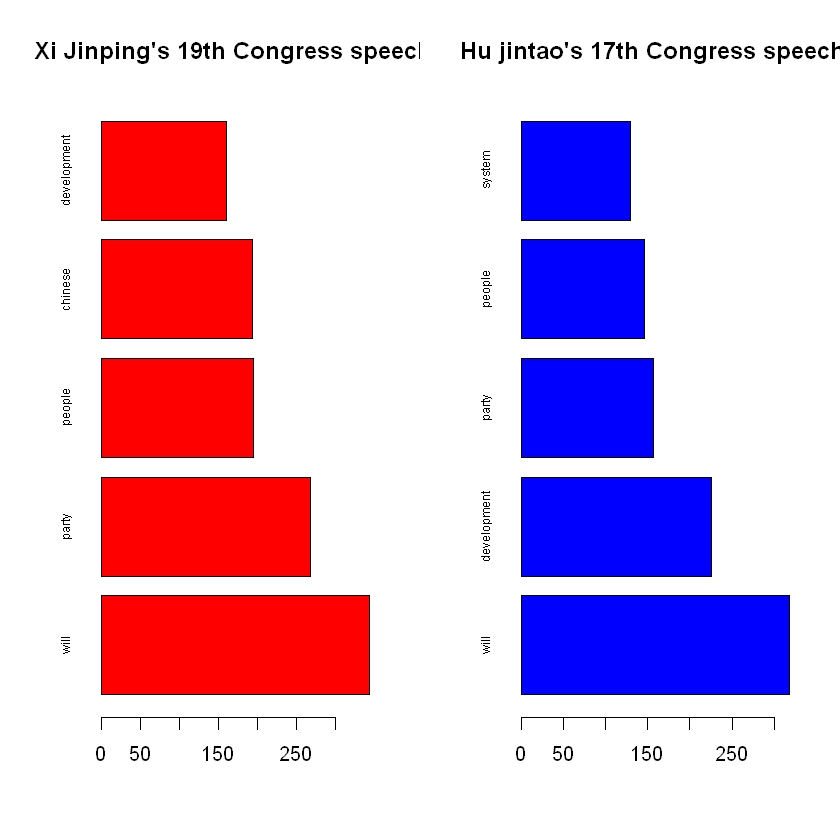

In [25]:
Num_of_terms_shown <- 5
par(mfrow=c(1,2)) # 1x2 panel plot
barplot(tdm[order(tdm[,"Xi's speech"], decreasing=TRUE)[1:Num_of_terms_shown],"Xi's speech"],col="red", cex.names = 0.6, horiz=TRUE)
title("Xi Jinping's 19th Congress speech")
barplot(tdm[order(tdm[,"Hu's speech"], decreasing=TRUE)[1:Num_of_terms_shown],"Hu's speech"],col="blue", cex.names = 0.6, horiz=TRUE)
title("Hu jintao's 17th Congress speech")

Question: is term frequency a fair way for comparison ? How can we make a better plot? Hints:

In [26]:
print(paste0("Total number of terms of Xi's speech (cleaned):",sum(tdm[,"Xi's speech"])))
print(paste0("Total number of terms of Hu's speech (cleaned):",sum(tdm[,"Hu's speech"])))

[1] "Total number of terms of Xi's speech (cleaned):14555"
[1] "Total number of terms of Hu's speech (cleaned):12315"


Next, we visualize the text frequency by using wordcloud function.

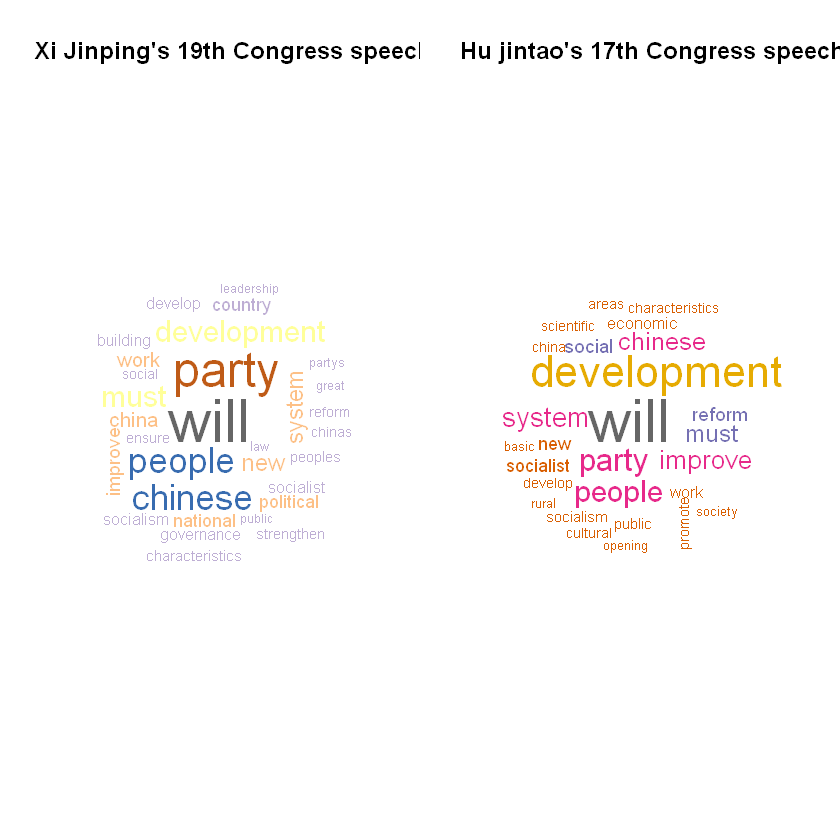

In [27]:
par(mfrow=c(1,2)) # 1x2 panel plot
wordcloud(xi.p, scale=c(3,.2),min.freq=50, max.words=Inf, random.order=F, colors=brewer.pal(8, "Accent"))   
title("Xi Jinping's 19th Congress speech")
wordcloud(hu.p, scale=c(3,.2),min.freq=50, max.words=Inf, random.order=F, colors=brewer.pal(8, "Dark2"))   
title("Hu jintao's 17th Congress speech")

Finally, we create a comparison wordcloud, which compares the relative frequency with which a term was used in the two documents. For example, Hu used the word “scientific” more frequenctly than did Xi and the word cloud thus prints the term “scientific” in the side of Hu. By the same token, you find “dream” is closer to Xi’s side. The plot shows the difference between the word usage of the leaders in their speeches and sheds light on the style of the leaders.

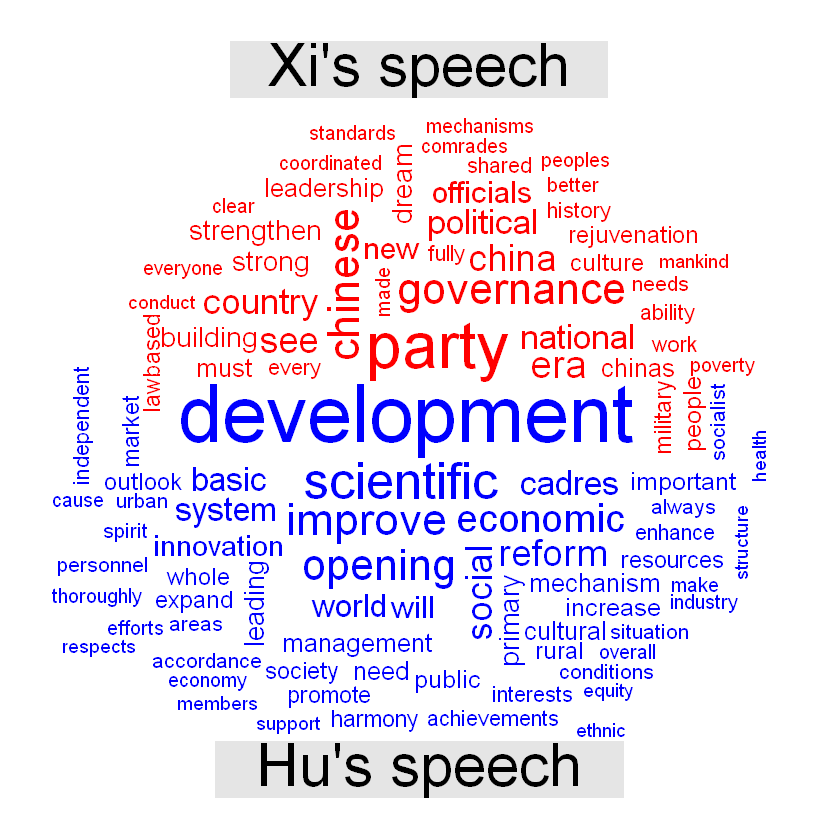

In [28]:
comparison.cloud(tdm,max.words=100,random.order=FALSE, colors=c("red","blue"))